# Local Outlier Factor Metrics Using http Subset

This program uses the precision, recall, fscore, and false alarm rate evaluation metrics for the LOF algorithm using the http subset. The following plots are produced below :

- Precision
- Recall
- Binary F1 Score
- Weighted F1 Score
- False Alarm Rate
- Grouped: Precison, Recall, Binary F1 Score
- Grouped: Precision, Recall, Weighted F1 Score

(The x-axis represents the number of nearest neighbors and the y-axis represents the scores for the three metrics)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

kdd99_data = fetch_kddcup99(subset='http')
X = kdd99_data['data']
y = kdd99_data['target']

y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


recall_scores = []
precision_scores = []
f1_scores = []
weighted_f1_scores = []
false_alarms = []

def calculations(n):
   
    lof = LocalOutlierFactor(n_neighbors = n)
    y_pred = lof.fit_predict(X)
    y_pred = np.array(y_pred)
    
    p = precision_score(y, y_pred, pos_label = -1)
    r = recall_score(y, y_pred, pos_label = -1)
    f = f1_score(y, y_pred, pos_label = -1)
    wf = f1_score(y, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)

In [3]:
ilist = []
i = 1
while i<5:
    calculations(i)
    ilist.append(i)
    i=i+1
    
i = 5
while i <= 400:
    calculations(i)
    ilist.append(i)
    i = i*2


In [4]:
print('Number of Nearest Neighbors: ', ilist)

Number of Nearest Neighbors:  [1, 2, 3, 4, 5, 10, 20, 40, 80, 160, 320]


In [5]:
print(X.shape)

(58725, 3)


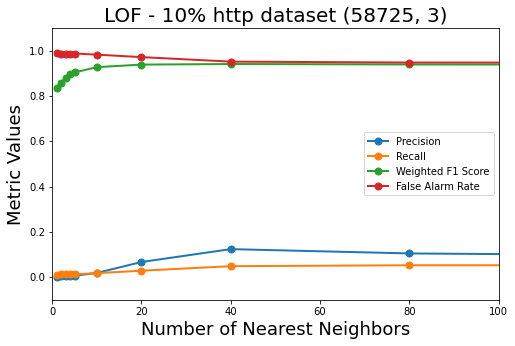

In [6]:
plt.figure(figsize = (8,5))

plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=7, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=7, label = 'Recall')
plt.plot(ilist, weighted_f1_scores, marker='o', linewidth=2, markersize=7, label = 'Weighted F1 Score')
plt.plot(ilist, false_alarms,marker='o', linewidth=2, markersize=7, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors', fontsize = 18)
plt.ylabel('Metric Values', fontsize = 18)
plt.title('LOF - 10% http dataset (58725, 3)', fontsize = 20)  
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.xlim((0, 100))

plt.show()

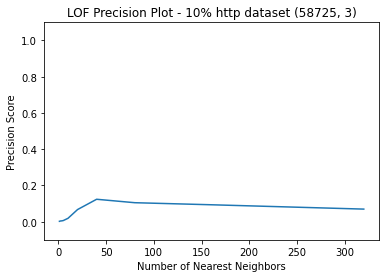

In [7]:
# Precision
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Precision Score')
plt.title('LOF Precision Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

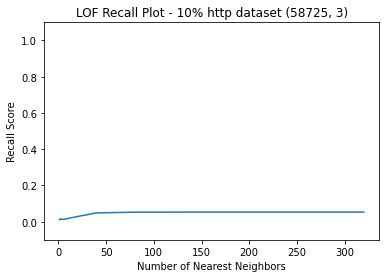

In [8]:
# Recall
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Recall Score')
plt.title('LOF Recall Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

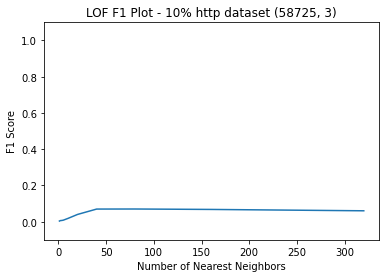

In [9]:
# Binary F1 Score
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('F1 Score')
plt.title('LOF F1 Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

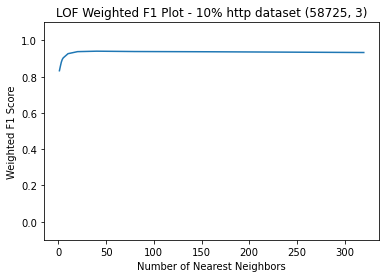

In [10]:
# Weighted F1 Score
plt.plot(ilist, weighted_f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Weighted F1 Score')
plt.title('LOF Weighted F1 Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

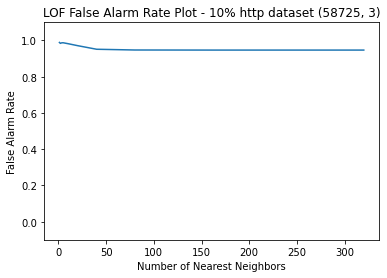

In [11]:
# False Alarm
plt.plot(ilist, false_alarms)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('False Alarm Rate')
plt.title('LOF False Alarm Rate Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

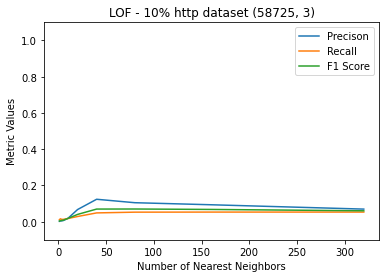

In [12]:
# Grouped - Precision, Recall, Binary F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

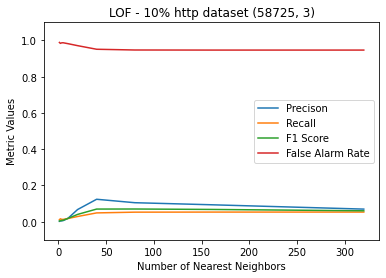

In [13]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

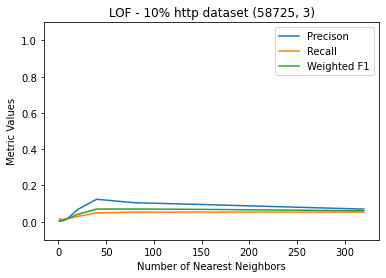

In [14]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

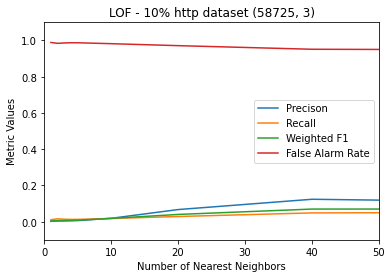

In [19]:
# Grouped - Precision, Recall, Weighted F1, False Alarm Rate
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Metric Values')
plt.title('LOF - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))
plt.xlim(0,50)

plt.show()

By looking at the metric values, it can be seen that the optimal value of K is about 40. Although increasing this parameter would result in more of the anomalies being detected, there would be a consequence of higher false alarm rates. The harmonic mean of precision and recall also seems to level out and decrease after 40. 

In [16]:
# For single calculations

def single_calculation(n):
   
    lof = LocalOutlierFactor(n_neighbors = n)
    y_pred = lof.fit_predict(X)
    y_pred = np.array(y_pred)
    
    p = precision_score(y, y_pred, pos_label = -1)
    r = recall_score(y, y_pred, pos_label = -1)
    f = f1_score(y, y_pred, pos_label = -1)
    wf = f1_score(y, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    print('Value of Nearest Neighbor Parameter:', n)
    print('Precision:',p)
    print('Recall:',r)
    print('Weighted F1:',wf)
    print('False Alarm Rate:', false_alarm)

In [17]:
single_calculation(40)

Value of Nearest Neighbor Parameter: 40
Precision: 0.12369942196531791
Recall: 0.04843820733363513
Weighted F1: 0.9409380258519519
False Alarm Rate: 0.9515617926663649


In [20]:
print(max(precision_scores))
print(min(false_alarms))
print(ilist)

0.12369942196531791
0.9470348574015391
[1, 2, 3, 4, 5, 10, 20, 40, 80, 160, 320]


In [23]:
single_calculation(80)

Value of Nearest Neighbor Parameter: 80
Precision: 0.10469314079422383
Recall: 0.05251244907197827
Weighted F1: 0.9390018460568186
False Alarm Rate: 0.9474875509280217
